In [1]:
# Klasterizavimas

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import math
from Skriptai.manofunkcijos import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
def make_circle(r, n, noise = 30, seed = 1234):
    np.random.seed(seed)
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-noise,noise), math.sin(2*math.pi/n*x)*r+np.random.normal(-noise,noise)) for x in range(1,n+1)]

small_circle = make_circle(100, 300, 10)
medium_circle = make_circle(300, 700, 20)
big_circle = make_circle(500, 1000, 30)

noise = [(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)]

<Axes: xlabel='x', ylabel='y'>

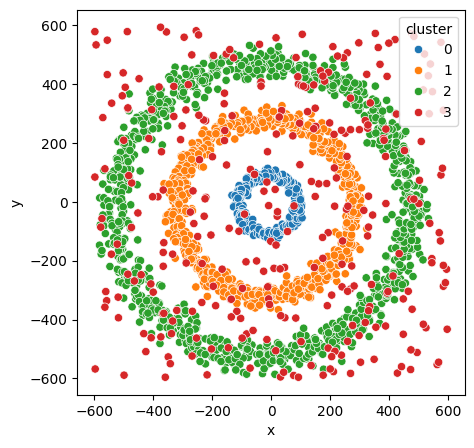

In [4]:
def arrray_to_df(arr, i):
    df = pd.DataFrame(arr)
    df['cluster'] = str(i)
    return df

data = [arrray_to_df(arr, i) for i, arr in enumerate([small_circle, medium_circle, big_circle, noise])]

data = pd.concat(data)
data.columns = ['x', 'y', 'cluster']


plt.rcParams['figure.figsize'] = [5,5]
sns.scatterplot(
data = data, 
x = 'x',
y = 'y',
hue = 'cluster'
)

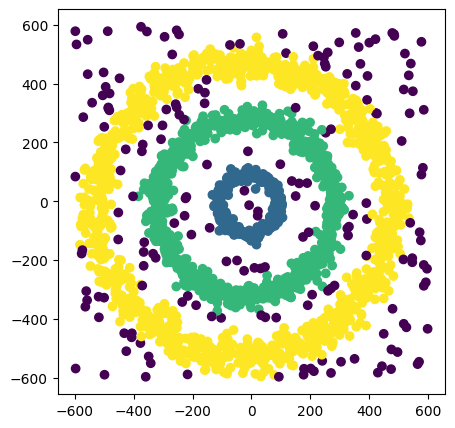

In [12]:
data['dbscan'] = DBSCAN(eps=32, min_samples=5).fit_predict(data[['x', 'y']])

plt.scatter(
    data['x'],
    data['y'],
    c = data['dbscan']
)

In [14]:
set(data['dbscan'])

{-1, 0, 1, 2}

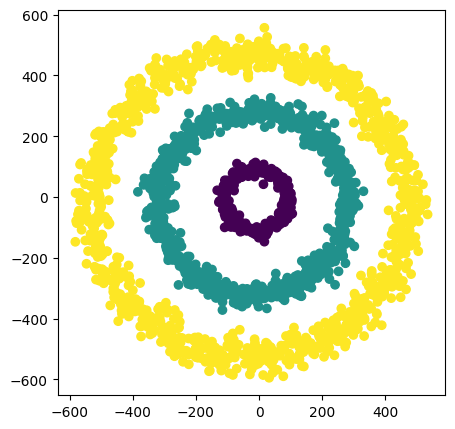

In [17]:
df = data[data['dbscan'] != -1]
plt.scatter(
    df['x'],
    df['y'],
    c = df['dbscan']
)

In [166]:
aruodas = query_to_dataframe('C:/Users/manta/OneDrive/Dokumentai/Python projektai/web_scrap.db', 'SELECT * FROM aruodas')
aruodas_df = aruodas[aruodas['Tipas'] == 'Butai pardavimui']
aruodas_df['Miestas_n'] = aruodas_df['Miestas'].apply(lambda x: x.split(',')[0])
aruodas_df['X'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[0]) if x!='None' else np.nan)
aruodas_df['Y'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[1]) if x!='None' else np.nan)
aruodas_df['Kaina_n'] = aruodas_df['Kaina'].apply(lambda x: float(x) if x != None else x)
aruodas_df['Plotas_n'] = aruodas_df['Plotas'].apply(lambda x: x.replace(',','.').split()[0] if x!=None else x)
aruodas_df['Plotas_n'] = aruodas_df['Plotas_n'].apply(lambda x: float(x) if x != None else x)
aruodas_df = aruodas_df.dropna(subset=['Plotas_n', 'Kaina_n'])
aruodas_df['Kaina_kv'] = aruodas_df['Kaina_n'] / aruodas_df['Plotas_n']
aruodas_df_vilnius = aruodas_df[aruodas_df['Miestas_n'] == 'Vilnius']
df_check = aruodas_df_vilnius[['X','Y']].dropna()
df = df_check

C:\Users\manta\AppData\Local\Temp\ipykernel_30204\1297337833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aruodas_df['Miestas_n'] = aruodas_df['Miestas'].apply(lambda x: x.split(',')[0])
C:\Users\manta\AppData\Local\Temp\ipykernel_30204\1297337833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aruodas_df['X'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[0]) if x!='None' else np.nan)
C:\Users\manta\AppData\Local\Temp\ipykernel_30204\1297337833.py:5: Set

In [21]:
df_check

X          Y     Kaina_kv
0      54.716843  25.291961  4072.063179
2      54.737668  25.213011  2432.835821
8      54.686228  25.323290  3675.701379
9      54.697577  25.219195  1726.973684
10     54.727996  25.246564  2276.388889
...          ...        ...          ...
12797  54.653464  25.302739  1470.588235
12799  54.700760  25.249500  3324.378778
12805  54.692830  25.280613  2948.746775
12806  54.702806  25.318312  2833.333333
12816  54.698749  25.240454  4103.143234

[3498 rows x 3 columns]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [148]:
scaler = StandardScaler()
scaler.fit(df_check[['X','Y']])
df_check[['X','Y']] = scaler.transform(df_check[['X','Y']])

df = df_check

In [89]:
df_check

X         Y  Kaina_kv  dbscan
0      0.479410  0.431298  0.548154       0
2      1.040367 -0.787164 -0.630292       1
8     -0.345267  0.914804  0.263208       2
9     -0.039555 -0.691733 -1.137739       3
10     0.779835 -0.269326 -0.742762       4
...         ...       ...       ...     ...
12797 -1.227816  0.597624 -1.322055    3238
12799  0.046184 -0.224022  0.010641    3239
12805 -0.167417  0.256157 -0.259402    3240
12806  0.101286  0.837973 -0.342373    3241
12816 -0.008002 -0.363624  0.570498    3242

[3498 rows x 4 columns]

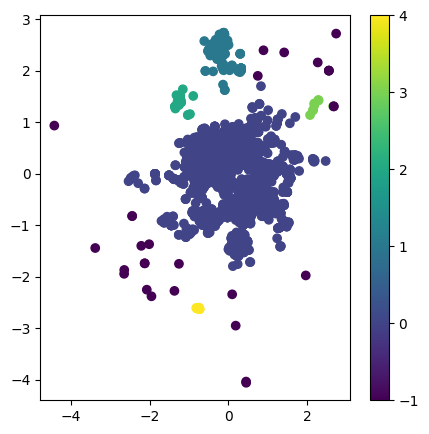

In [165]:
df = df.query('X < 5 and X > -5 and Y < 5 and Y > -5')
df['dbscan'] = DBSCAN(eps=0.4, min_samples=6).fit_predict(df[['X', 'Y']])
plt.scatter(
    df['X'],
    df['Y'],
    # df['Kaina_kv'],
    c = df['dbscan']
)
plt.colorbar()
X = df[['X','Y']]

In [ ]:
# https://en.wikipedia.org/wiki/Silhouette_(clustering) 

In [ ]:
# paskaičiuokiet sliuete score
# a) pabandykite su gridsearchu rasti optimalius parametrsu, ir su jais pritaikykite dbscan savo duomenims

In [162]:
from sklearn.metrics import silhouette_score as shs

shs(X,df['dbscan']) # surandame Average Silhouette Score

0.05968543022672991

In [194]:
df_check = aruodas_df_vilnius[['X','Y']].dropna()
df = df_check
X = df[['Y','X']]

In [195]:
epsilon = np.linspace(0.01, 1, num = 20) # ε vertės
min_samples = np.arange(2,25,step=2) # MinPts vertės

In [172]:
# dabar implementuojam gridsearchcv:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'eps':epsilon,
    'min_samples':min_samples
}
dbscn = DBSCAN()
grid_search = GridSearchCV(dbscn, param_grid, scoring='accuracy')
grid_search.fit(X)

best_eps = grid_search.best_params_['eps']
best_min_samples = grid_search.best_params_['min_samples']

print(best_eps, best_min_samples, sep='\n')

0.01
2


In [173]:
import plotly.express as px

In [176]:

dbm = DBSCAN(eps=best_eps,min_samples=best_min_samples) # modifikavom ε ir minPts

predictions = dbm.fit(X) # fitinam koordinantes

df['cluster'] = predictions.labels_ # prisidedam naują stulpelį su predicted cluster labels

fig = px.scatter_mapbox(data_frame=df, lat='X', lon='Y', color='cluster', zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=800, height=600)
fig.show()

In [196]:
def GridSearch(combinations, X):
    '''
    Čia combinations - visos galimos epsilon ir minPts kombinacijos, kurias norime tikrinti
    X - data, kurią fitiname
    '''
    scores = [] # čia dėsime shs score
    all_labels = [] # čia dėsime predited labels
    for i, (eps, num_samples) in enumerate(combinations):
        predictions = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = predictions.labels_
        # ir klasterių pavadinimus: (jie gali kartotis, tad pasidarome set'ą - unikalių verčių sąrašą)
        clusters = list(set(labels))
        # randam klasterių kiekį:
        clusters_count = len(clusters)
        if -1 in clusters: # -1 žymimas noise, vadinasi, klasterių yra vienu mažiau, nei unikalių laibelių
            clusters_count = clusters_count - 1                      
        if (clusters_count < 2) and (clusters_count > 25): # jei rado mažiau nei 2 klasterius - blogai, turime dėmę
            # o viršutinė riba 25 - apsiribojame, kad nepridarytų belekiek klasterių, kas rodytų overfitinimą
            scores.append(-20)
            all_labels.append('Poor values')
            print(f'{i:4} iteracija skipinta', end='\r')
            continue
        if len(labels) > 2: # jei labelių bus 1 - silhouette fails, negalima toliau eiti
            try:
                scores.append(shs(X,labels))
                all_labels.append(labels)
                print(f'{i:4} iteracija pridėta', end="\r")
            except Exception as ex:
                print(f'{i:4} iteracija skipinta, klaida {ex}', end='\r')
    best_index = np.argmax(scores)
    best_params = combinations[best_index]
    best_labels = all_labels[best_index]
    best_score = scores[best_index]
    return {'eps':best_params[0], 'minPts':best_params[1],'labels':best_labels, 'score':best_score}


import itertools

combinations = list(itertools.product(epsilon,min_samples))

bp = GridSearch(combinations,X)

In [197]:
for k,v in bp.items():
    print(k,v, sep = '\t')

eps	0.37473684210526315
minPts	2
labels	[0 0 0 ... 0 0 0]
score	0.9273453900299586


In [198]:
# pritaikykime gautus parametrus:
dbm = DBSCAN(eps=bp['eps'],min_samples=bp['minPts'])
# dbm = DBSCAN(eps=0.03,min_samples=5) # modifikavom ε ir minPts

predictions = dbm.fit(X) # fitinam koordinantes

df['cluster'] = predictions.labels_ # prisidedam naują stulpelį su predicted cluster labels

fig = px.scatter_mapbox(data_frame=df, lat='X', lon='Y', color='cluster', zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
# Suskirstykite eismo įvykius į klasterius (2022 metų) (pagal koordinantes, atskirai kiekvienai eismo įvykio rūšiai, su 
# DBSCAN bei KMeans). Darydami KMeans klasterizaciją, pasinaudokite elbow grafiku optimaliam klasterių skaičiaus nustatymu
# (Jei pavyksta)
# Patekite vizualizacijas klasterių išsidėstymo su mapbox()
# Pasirinkite vieną eismo įvykių rūšį, ir su GridsearchCV, GridSearch klase suraskite optimalų klasterių kiekį
# Tada taip pat pateikite klasterių vizualizacijas.

In [199]:
df = pd.read_json(path_or_buf='https://data.gov.lt/media/filer_public/5e/b8/5eb89d55-f57a-48ec-b1a2-063692c1b6a7/ei_2022_12_31.json', convert_dates=['dataLaikas'])
df = df[['dataLaikas', 'iskaitinis','dalyviuSkaicius','rusis', 'ilguma','platuma']].dropna(subset=['ilguma','platuma'])

In [200]:
from Skriptai.LKS94WGS84 import *

In [201]:
LAT, LON = [],[]

for ilguma, platuma in zip(df['ilguma'],df['platuma']):
    lat, lon = grid2geo(platuma, ilguma)
    LAT.append(lat)
    LON.append(lon)

df['long'] = LON
df['lat'] = LAT

In [202]:
df

dataLaikas  iskaitinis  dalyviuSkaicius  \
0     2021-12-31 22:00:00           0              1.0   
1     2022-01-01 00:40:00           0              2.0   
2     2022-01-01 02:02:00           0              1.0   
3     2022-01-01 01:53:00           0              1.0   
4     2021-12-31 12:35:00           0              1.0   
...                   ...         ...              ...   
23515 2022-12-31 19:40:00           0              1.0   
23516 2022-12-31 17:35:00           0              2.0   
23517 2022-12-31 20:00:00           0              1.0   
23518 2022-12-31 19:20:00           0              1.0   
23519 2022-12-31 18:40:00           0              1.0   

                                              rusis     ilguma   platuma  \
0                                Kiti eismo įvykiai  6083759.0  491606.0   
1                                       Susidūrimas  6181902.0  317439.0   
2                           Užvažiavimas ant gyvūno  6161589.0  333263.0   
3                                        Apvirtimas  6104844.0  630436.0   
4                         Užvažiavimas ant kliūties  6102529.0  495530.0   
...                                             ...        ...       ...   
23515                       Užvažiavimas ant gyvūno  6060864.0  483320.0   
23516                                   Susidūrimas  6218953.0  589894.0   
23517                       Užvažiavimas ant gyvūno  6127284.0  504282.0   
23518                            Kiti eismo įvykiai  6126630.0  551706.0   
23519  Susidūrimas su stovinčia transporto priemone  6242381.0  396595.0   

            long        lat  
0      23.869164  54.889850  
1      21.092653  55.737249  
2      21.356655  55.560661  
3      26.041968  55.062240  
4      23.930034  55.058543  
...          ...        ...  
23515  23.741328  54.683934  
23516  25.444706  56.096038  
23517  24.067398  55.280952  
23518  24.813673  55.272384  
23519  22.329130  56.303669  

[23483 rows x 8 columns]

In [203]:
fig = px.scatter_mapbox(data_frame=df, lat='lat', lon='long', zoom=6)
fig.update_layout(mapbox_style="open-street-map") # open-street-map, carto-darkmatter
fig.update_layout(width=800, height=600)
fig.show()

In [242]:
df['rusis'].value_counts()

rusis
Susidūrimas                                     5319
Užvažiavimas ant gyvūno                         4927
Susidūrimas su stovinčia transporto priemone    4799
Kiti eismo įvykiai                              4235
Užvažiavimas ant kliūties                       1949
Užvažiavimas ant pėsčiojo                        843
Apvirtimas                                       663
Susidūrimas su dviračiu                          561
Susidūrimas su motociklu                         121
Susidūrimas su mopedu                             62
Susidūrimas su bėgine transporto priemone          4
Name: count, dtype: int64

In [243]:
rusys = list(df['rusis'].value_counts()[:4].index)

In [244]:
rusys

['Susidūrimas',
 'Užvažiavimas ant gyvūno',
 'Susidūrimas su stovinčia transporto priemone',
 'Kiti eismo įvykiai']

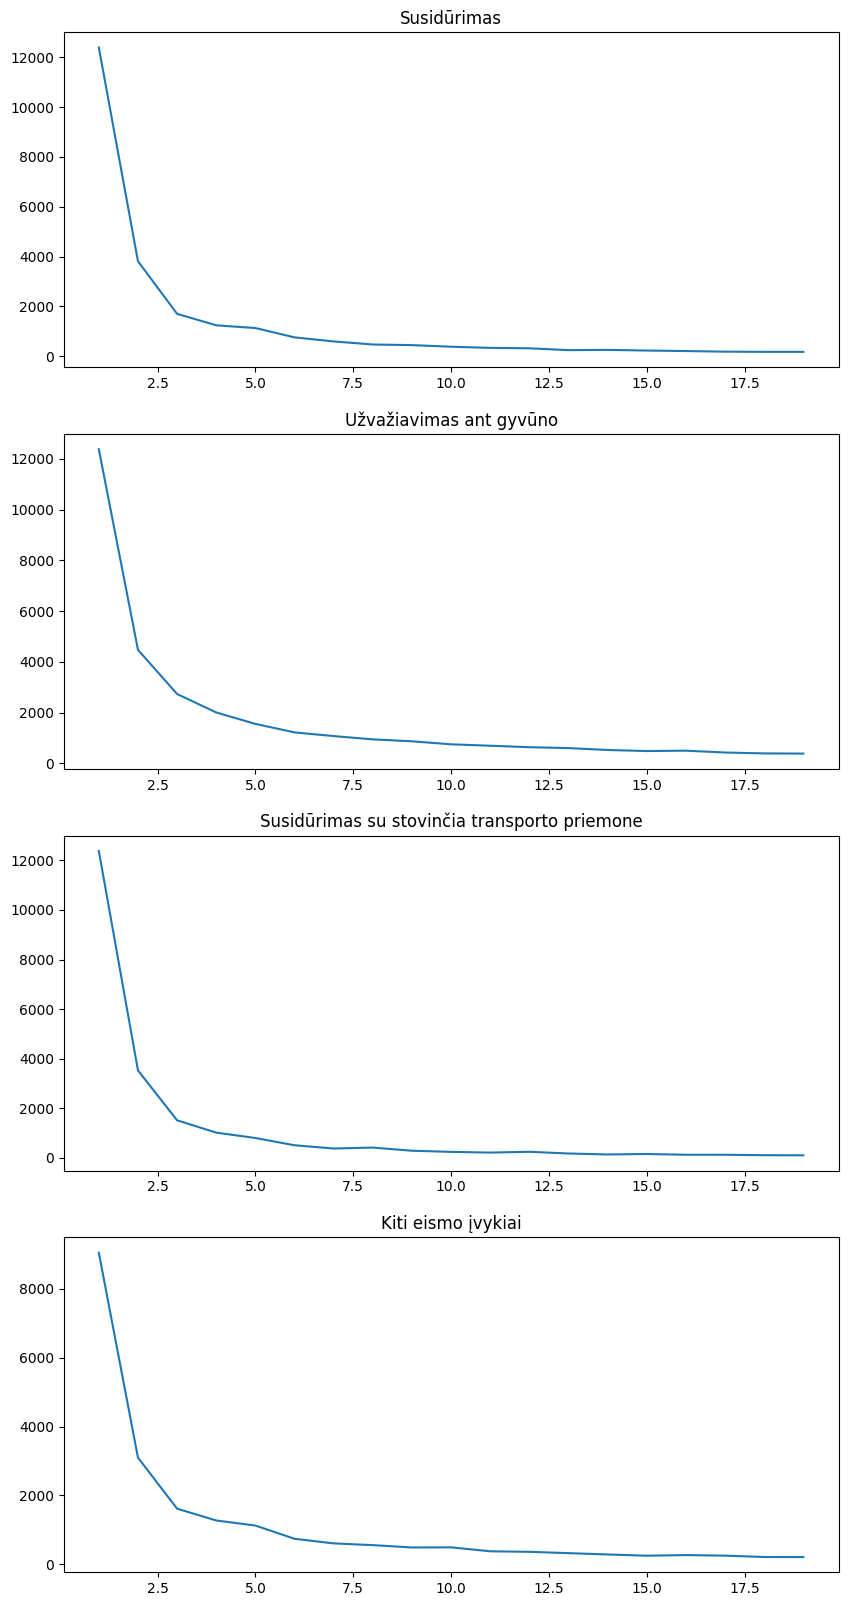

In [251]:
kiekis = len(rusys)
fig, ax = plt.subplots(kiekis,1, figsize=(10,20))
for r, kiek in zip(rusys, range(kiekis)):
    df_rusis = df[df['rusis'] == r]
    X = df_rusis[['lat','long']]
    sse = []
    for k in range(1,20):
        km = KMeans(n_clusters=k)
        km.fit(X)
        sse.append(km.inertia_)
    ax[kiek].plot(range(1,20), sse)
    ax[kiek].set_title(r)

In [286]:
kmeans = KMeans(n_clusters=6)
for r in rusys:
    df_rusis = df[df['rusis'] == r]
    X = df_rusis[['lat','long']]
    kmeans.fit(X)
    df_rusis['cluster'] = kmeans.labels_
    fig = px.scatter_mapbox(data_frame=df_rusis, lat='lat', lon='long', color='cluster', zoom=6, title=r)
    fig.update_layout(mapbox_style="open-street-map") # open-street-map, carto-darkmatter
    fig.update_layout(width=800, height=600)
    fig.show()

In [258]:
df_filter = df[df['rusis'] == 'Susidūrimas']

In [272]:
X = df_filter[['lat','long']]
epsilon = np.linspace(0.01, 1, num = 20) # ε vertės
min_samples = np.arange(2,25,step=2) # MinPts vertės

In [221]:
from sklearn.model_selection import GridSearchCV # su gridsearchcv tuninsime parametrus
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 10 + 1),
'init': ['k-means++', 'random'],
'n_init': [5, 10, 15],
'max_iter': [100, 200, 300, 400, 500],
'tol': [0.0001, 0.001, 0.01],
'algorithm': ['auto', 'full', 'elkan', 'lloyd'],
'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 10, 'n_init': 10, 'random_state': 42, 'tol': 0.0001}
Optimal number of clusters based on parameter grid: 10


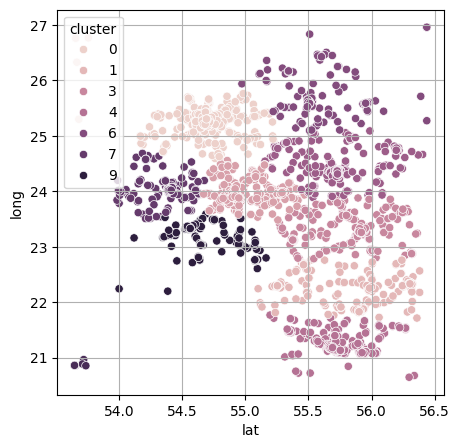

In [279]:
kmeans = KMeans(algorithm='elkan', init='k-means++', max_iter=100, n_clusters=grid_search.best_params_['n_clusters'], n_init=10, random_state=42, tol=0.0001)

predicted_labels = kmeans.fit_predict(df_filter[['lat','long']])
df_filter['cluster'] = predicted_labels

ax = sns.scatterplot(data=df_filter, x='lat', y='long', hue='cluster')

ax.grid(True)

plt.show()

In [282]:
fig = px.scatter_mapbox(data_frame=df_filter, lat='lat', lon='long', zoom=6, color='cluster', title='Susidūrimai')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=800, height=600)
fig.show()

In [263]:
import itertools

combinations = list(itertools.product(epsilon,min_samples))

bp = GridSearch(combinations,X)

In [264]:
for k,v in bp.items():
    print(k,v, sep = '\t')

eps	0.11421052631578947
minPts	16
labels	[ 0  1 -1 ... 14  0 -1]
score	0.5769432690496417


In [284]:
# pritaikykime gautus parametrus:
dbm = DBSCAN(eps=bp['eps'],min_samples=bp['minPts'])
# dbm = DBSCAN(eps=0.03,min_samples=5) # modifikavom ε ir minPts

predictions = dbm.fit(X) # fitinam koordinantes

X['cluster'] = predictions.labels_ # prisidedam naują stulpelį su predicted cluster labels
X = X[X['cluster'] != -1]
fig = px.scatter_mapbox(data_frame=X, lat='lat', lon='long', color='cluster', zoom=6, title='Susidūrimai')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=800, height=600)
fig.show()